# Write a python script to implement Fuzzy c-means and plot the clusters


In [2]:
# import necessary libraries
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
import time

In [3]:
colors = ['y', 'ForestGreen', 'k', 'r', 'c', 'm', 'b', 'g', 'Brown', 'orange']  # list of plotting colours
number_of_clusters = 5  # initial number of clusters

print("Generating random data..")
# Define the initial cluster centers
centers = [np.random.randint(1, 10, (2)) for _ in range(number_of_clusters)]
sigmas = [np.random.uniform(0.0, 1.0, (2)) for _ in range(number_of_clusters)]
print(sigmas)

Generating random data..
[array([0.62555013, 0.54662083]), array([0.49377805, 0.25541184]), array([0.47424597, 0.66463839]), array([0.98367578, 0.25957046]), array([0.96782496, 0.30600277])]


Plotting test data (press enter to continue)..


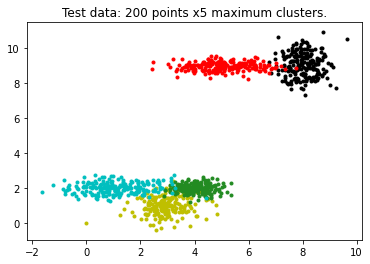

In [4]:
# Generate test data
np.random.seed(int(time.time()))  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
number_of_points = 200

for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(number_of_points) * xsigma + xmu)) # * xsigma + xmu
    ypts = np.hstack((ypts, np.random.standard_normal(number_of_points) * ysigma + ymu)) # * ysigma + ymu
    labels = np.hstack((labels, np.ones(number_of_points) * i))

# Visualize the test data
fig0, ax0 = plt.subplots()
for label in range(number_of_clusters):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
             color=colors[label])
ax0.set_title('Test data: %d points x%d maximum clusters.' % (number_of_points, number_of_clusters))
print("Plotting test data (press enter to continue)..")
plt.show()
#input()
#plt.close(fig0)

Calculating optimal number of clusters..
Clustering for 2 centers..completed   FPC: 0.934216
Clustering for 3 centers..completed   FPC: 0.823718
Clustering for 4 centers..completed   FPC: 0.804871
Clustering for 5 centers..completed   FPC: 0.752454
Clustering for 6 centers..completed   FPC: 0.716817
Clustering for 7 centers..completed   FPC: 0.679402
Clustering for 8 centers..completed   FPC: 0.646822
Clustering for 9 centers..completed   FPC: 0.627716
Clustering for 10 centers..completed   FPC: 0.609683
Plotting generated cluster layouts (press enter to continue)..


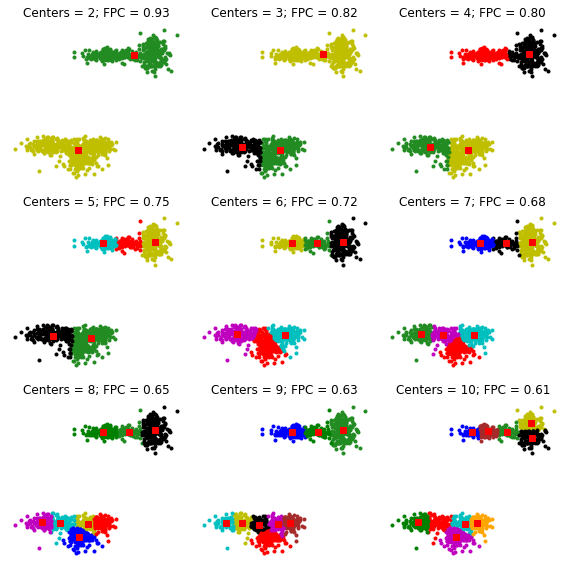

Best result: 2 centers, FPC 0.934216


In [5]:
# Clustering our data several times, with between 2 and 9 clusters.

print("Calculating optimal number of clusters..")
# Set up the loop and plot
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
alldata = np.vstack((xpts, ypts))
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    print("Clustering for %d centers.." % ncenters, end='')
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)
    print("completed   FPC: %g" % fpc)
    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()
print("Plotting generated cluster layouts (press enter to continue)..")
plt.show()
#input()
#plt.close(fig1)

best_cluster = np.argmax(fpcs, axis=0) + 2
print("Best result: %d centers, FPC %g" % (best_cluster, fpcs[best_cluster - 2]))

Plotting number of centers vs FPC (press enter to continue)..


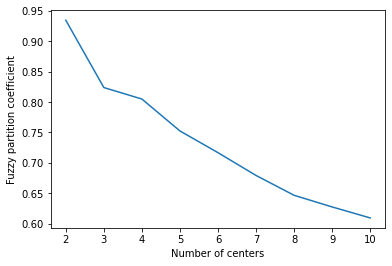

In [6]:
"""
The fuzzy partition coefficient (FPC)
-------------------------------------

The FPC is defined on the range from 0 to 1, with 1 being best. It is a metric
which tells us how cleanly our data is described by a certain model. Next we
will cluster our set of data - which we know has three clusters - several
times, with between 2 and 9 clusters. We will then show the results of the
clustering, and plot the fuzzy partition coefficient. When the FPC is
maximized, our data is described best.

"""
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")

print("Plotting number of centers vs FPC (press enter to continue)..")
plt.show()
#input()
#plt.close(fig2)

Regenerating the model with 2 centers..
Plotting on the trained model with the original data (press enter to continue)..


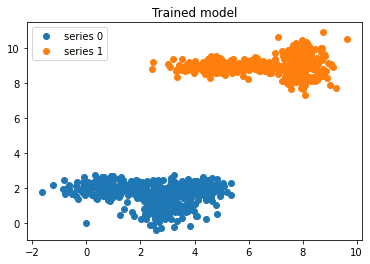

In [7]:
"""
Building the model
------------------

We know our best model has three cluster centers. We'll rebuild a 3-cluster
model for use in prediction, generate new uniform data, and predict which
cluster to which each new data point belongs.

"""

print("Regenerating the model with %d centers.." % best_cluster)
# Regenerate fuzzy model with 'best_cluster' cluster centers - note that center ordering
# is random in this clustering algorithm, so the centers may change places
cntr, u_orig, _, _, _, _, _ = fuzz.cluster.cmeans(
    alldata, best_cluster, 2, error=0.005, maxiter=1000)

# Display the n-cluster model
fig2, ax2 = plt.subplots()
ax2.set_title('Trained model')
for j in range(best_cluster):
    ax2.plot(alldata[0, u_orig.argmax(axis=0) == j],
             alldata[1, u_orig.argmax(axis=0) == j], 'o',
             label='series ' + str(j))
ax2.legend()

print("Plotting on the trained model with the original data (press enter to continue)..")
plt.show()
#input()
#plt.close(fig2)

Generating new random data..
[[0.03184123 0.48754924 0.44163599 0.00514093 0.66638211 0.75259229
  0.8790451  0.06349033 0.13858425 0.98596014]
 [0.96815877 0.51245076 0.55836401 0.99485907 0.33361789 0.24740771
  0.1209549  0.93650967 0.86141575 0.01403986]]
Plotting on the trained model with new random data (press enter to continue)..


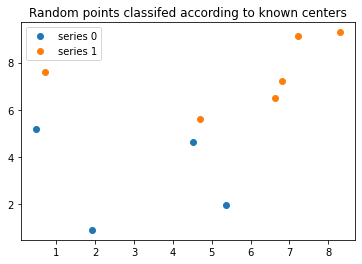

Fuzzy C-Means Clustering Completed!


In [12]:
"""
Prediction
----------

Finally, we generate uniformly sampled data over this field and classify it
via ``cmeans_predict``, incorporating it into the pre-existing model.

"""

print("Generating new random data..")
# Generate uniformly sampled data spread across the range [0, 10] in x and y
newdata = np.random.uniform(0, 1, (10, 2)) * 10

# Predict new cluster membership with `cmeans_predict` as well as
# `cntr` from the best-cluster model
u, u0, d, jm, p, fpc = fuzz.cluster.cmeans_predict(
    newdata.T, cntr, 2, error=0.005, maxiter=1000)

print(u)
# Plot the classified uniform data. Note for visualization the maximum
# membership value has been taken at each point (i.e. these are hardened,
# not fuzzy results visualized) but the full fuzzy result is the output
# from cmeans_predict.
cluster_membership = np.argmax(u, axis=0)  # Hardening for visualization
fig3, ax3 = plt.subplots()
ax3.set_title('Random points classifed according to known centers')
for j in range(best_cluster):
    ax3.plot(newdata[cluster_membership == j, 0],
             newdata[cluster_membership == j, 1], 'o',
             label='series ' + str(j))
ax3.legend()
print("Plotting on the trained model with new random data (press enter to continue)..")
plt.show()
#input()
#plt.close(fig3)

print("Fuzzy C-Means Clustering Completed!")